In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

import warnings
warnings.filterwarnings(action = 'ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
from matplotlib import rcParams

# 분석 데이터 수집 - 크롤링

- k-pop 아이돌 정보 데이터 수집

In [2]:
import requests

site1 = 'https://dbkpop.com/db/all-k-pop-idols'     # kpop 아이돌 전체 정보
site2 = 'https://dbkpop.com/db/k-pop-girlgroups'     # kpop 여자 그룹 정보
site3 = 'https://dbkpop.com/db/k-pop-boybands'     # kpop 남자 그룹 정보

r1 = requests.get(site1)
r2 = requests.get(site2)
r3 = requests.get(site3)

all_df = pd.read_html(r1.text, displayed_only = False)[0]
all_df.columns = all_df.columns.get_level_values(0)

girl_df = pd.read_html(r2.text, displayed_only = False)[0]
girl_df.columns = girl_df.columns.get_level_values(0)

boy_df = pd.read_html(r3.text, displayed_only = False)[0]
boy_df.columns = boy_df.columns.get_level_values(0)

# 데이터 기본 정보 확인

In [3]:
all_df.head()

,Profile,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Birthplace,Other Group,Former Group,Gender,Position,Instagram,Twitter
0,Profile,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160,44,Jeonju,"TTS, Oh!GG",NaN,F,"Leader, Main Vocalist",taeyeon_ss,NaN
1,NaN,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158,43,California,NaN,NaN,F,NaN,svnnynight,NaN
2,NaN,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163,50,San Francisco,TTS,NaN,F,NaN,xolovestephi,NaN
3,NaN,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158,48,Incheon,NaN,NaN,F,NaN,watasiwahyo,NaN
4,NaN,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167,45,Goyang,NaN,NaN,F,NaN,yulyulk,NaN


In [4]:
girl_df.head()

,Profile,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,Profile,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,SONE,Yes
1,NaN,KARA,NaN,카라,2007-03-29,DSP,4,5,Kamilia,No
2,NaN,2NE1,NaN,투애니원,2009-05-06,YG,4,4,Blackjack,No
3,Profile,T-ara,NaN,티아라,2009-07-29,MBK,4,6,QUEEN'S,Hiatus
4,Profile,SISTAR,NaN,씨스타,2010-03-06,Starship,4,4,STAR1,No


In [5]:
boy_df.head()

,Profile,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,Profile,BIGBANG,NaN,빅뱅,2006-08-19,YG,4,5,VIP,Yes
1,Profile,Super Junior,SJ,슈퍼주니어,2005-11-06,SM,11,12,ELF,Yes
2,NaN,TVXQ!,TVXQ,동방신기,2003-12-26,SM,2,5,Cassiopeia,Yes
3,Profile,SHINee,NaN,샤이니,2008-05-25,SM,4,5,Shawol,Yes
4,Profile,EXO,NaN,엑소,2012-04-08,SM,9,12,EXO-L,Yes


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Profile         451 non-null    object
 1   Stage Name      1666 non-null   object
 2   Full Name       1658 non-null   object
 3   Korean Name     1657 non-null   object
 4   K. Stage Name   1665 non-null   object
 5   Date of Birth   1666 non-null   object
 6   Group           1533 non-null   object
 7   Country         1666 non-null   object
 8   Second Country  58 non-null     object
 9   Height          1666 non-null   int64 
 10  Weight          1666 non-null   int64 
 11  Birthplace      767 non-null    object
 12  Other Group     137 non-null    object
 13  Former Group    245 non-null    object
 14  Gender          1666 non-null   object
 15  Position        77 non-null     object
 16  Instagram       156 non-null    object
 17  Twitter         12 non-null     object
dtypes: int64

In [7]:
girl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Profile       97 non-null     object
 1   Name          200 non-null    object
 2   Short         28 non-null     object
 3   Korean Name   200 non-null    object
 4   Debut         200 non-null    object
 5   Company       200 non-null    object
 6   Members       200 non-null    int64 
 7   Orig. Memb.   200 non-null    int64 
 8   Fanclub Name  54 non-null     object
 9   Active        200 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [8]:
boy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Profile       67 non-null     object
 1   Name          194 non-null    object
 2   Short         22 non-null     object
 3   Korean Name   194 non-null    object
 4   Debut         194 non-null    object
 5   Company       193 non-null    object
 6   Members       194 non-null    int64 
 7   Orig. Memb.   194 non-null    int64 
 8   Fanclub Name  71 non-null     object
 9   Active        194 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.3+ KB


# 데이터 전처리

In [11]:
# 필요한 컬럼만 추출

all_cols = ['K. Stage Name', 'Date of Birth', 'Group', 'Country', 'Height', 'Gender']
girl_cols = ['Name', 'Short', 'Korean Name', 'Debut', 'Company', 'Members', 'Orig. Memb.', 'Active']
boy_cols = ['Name', 'Short', 'Korean Name', 'Debut', 'Company', 'Members', 'Orig. Memb.', 'Active']

all_df = all_df[all_cols]
girl_df = girl_df[girl_cols]
boy_df = boy_df[boy_cols]

In [13]:
all_df, girl_df, boy_df

(     K. Stage Name Date of Birth     Group      Country  Height Gender
 0               태연    1989-03-09      SNSD  South Korea     160      F
 1               써니    1989-05-15      SNSD  South Korea     158      F
 2              티파니    1989-08-01      SNSD  South Korea     163      F
 3               효연    1989-09-22      SNSD  South Korea     158      F
 4               유리    1989-12-05      SNSD  South Korea     167      F
 ...            ...           ...       ...          ...     ...    ...
 1661            민지    2004-05-07  NewJeans  South Korea     169      F
 1662            하니    2004-10-06  NewJeans      Vietnam     162      F
 1663           다니엘    2005-04-11  NewJeans  South Korea     165      F
 1664            해린    2006-05-15  NewJeans  South Korea     165      F
 1665            혜인    2008-04-21  NewJeans  South Korea     170      F
 
 [1666 rows x 6 columns],
                   Name Short Korean Name       Debut    Company  Members  \
 0    Girls' Generation  SNSD  

## merge

### 1. 공통 컬럼 생성

In [16]:
# 결측치 치환

girl_df['Name'] = girl_df['Name'].fillna('_')
girl_df['Short'] = girl_df['Short'].fillna('_')

In [17]:
# 공통 컬럼(Group) 생성

girl_df['Group'] = girl_df['Name'] + '|' + girl_df['Short']
girl_df

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Group
0,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes,Girls' Generation|SNSD
1,KARA,_,카라,2007-03-29,DSP,4,5,No,KARA|_
2,2NE1,_,투애니원,2009-05-06,YG,4,4,No,2NE1|_
3,T-ara,_,티아라,2009-07-29,MBK,4,6,Hiatus,T-ara|_
4,SISTAR,_,씨스타,2010-03-06,Starship,4,4,No,SISTAR|_
...,...,...,...,...,...,...,...,...,...
195,Kep1er,_,케플러,2022-03-01,WakeOne,9,9,Yes,Kep1er|_
196,Hi-L,_,하이엘,2021-08-11,Kpop Live,6,6,Yes,Hi-L|_
197,H1-KEY,_,하이키,2022-01-05,GLG,4,4,Yes,H1-KEY|_
198,CLASS:y,_,클래씨,2022-05-05,Universal,7,7,Yes,CLASS:y|_


In [18]:
all_df['Group']

0           SNSD
1           SNSD
2           SNSD
3           SNSD
4           SNSD
          ...   
1661    NewJeans
1662    NewJeans
1663    NewJeans
1664    NewJeans
1665    NewJeans
Name: Group, Length: 1666, dtype: object

In [19]:
girl_df['Group']

0      Girls' Generation|SNSD
1                      KARA|_
2                      2NE1|_
3                     T-ara|_
4                    SISTAR|_
                ...          
195                  Kep1er|_
196                    Hi-L|_
197                  H1-KEY|_
198                 CLASS:y|_
199             LE SSERAFIM|_
Name: Group, Length: 200, dtype: object

In [20]:
# 공통된 문자열을 키(컬럼)값으로 사용하기 위한 처리

for group_name in all_df['Group']:
    if not pd.isna(group_name):     # 결측값이 아니라면
        girl_df.loc[girl_df['Group'].str.contains(group_name), 'Group'] = group_name     # 겹치는 문자열로 대체

In [21]:
girl_df

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Group
0,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes,SNSD
1,KARA,_,카라,2007-03-29,DSP,4,5,No,KARA
2,2NE1,_,투애니원,2009-05-06,YG,4,4,No,2NE1
3,T-ara,_,티아라,2009-07-29,MBK,4,6,Hiatus,T-ara
4,SISTAR,_,씨스타,2010-03-06,Starship,4,4,No,SISTAR
...,...,...,...,...,...,...,...,...,...
195,Kep1er,_,케플러,2022-03-01,WakeOne,9,9,Yes,Kep1er
196,Hi-L,_,하이엘,2021-08-11,Kpop Live,6,6,Yes,Hi-L
197,H1-KEY,_,하이키,2022-01-05,GLG,4,4,Yes,H1-KEY
198,CLASS:y,_,클래씨,2022-05-05,Universal,7,7,Yes,CLASS:y


In [22]:
## boy_df 에도 동일하게 적용

# 결측치 치환
boy_df['Name'] = boy_df['Name'].fillna('_')
boy_df['Short'] = boy_df['Short'].fillna('_')

# 공통 컬럼(Group) 생성
boy_df['Group'] = boy_df['Name'] + '|' + boy_df['Short']

# 공통된 문자열을 키(컬럼)값으로 사용하기 위한 처리
for group_name in all_df['Group']:
    if not pd.isna(group_name):
        boy_df.loc[boy_df['Group'].str.contains(group_name), 'Group'] = group_name
        
boy_df

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Group
0,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes,BIGBANG
1,Super Junior,SJ,슈퍼주니어,2005-11-06,SM,11,12,Yes,Super Junior
2,TVXQ!,TVXQ,동방신기,2003-12-26,SM,2,5,Yes,TVXQ
3,SHINee,_,샤이니,2008-05-25,SM,4,5,Yes,SHINee
4,EXO,_,엑소,2012-04-08,SM,9,12,Yes,EXO
...,...,...,...,...,...,...,...,...,...
189,TEMPEST,_,템페스트,2022-03-02,Yuehua,7,7,Yes,TEMPEST
190,TRENDZ,_,트렌드지,2022-01-05,Interpark,7,7,Yes,TRENDZ|_
191,YOUNITE,_,유나이트,2022-04-20,Brand New,9,9,Yes,YOUNITE
192,Xdinary Heroes,_,엑스디너리 히어로즈,2021-12-06,JYP,6,6,Yes,Xdinary Heroes|_


### 2. 데이터 병합

In [23]:
df1 = pd.merge(all_df, girl_df, how = 'inner', on = 'Group')
df2 = pd.merge(all_df, boy_df, how = 'inner', on = 'Group')

In [25]:
# 행방향으로 df1, df2 결합

df = pd.concat([df1, df2], axis = 0)
df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,태훈,2002-11-19,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
665,현수,2003-09-16,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
666,준혁,2004-09-20,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
667,은휘,2004-11-11,TNX,South Korea,178,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes


In [26]:
df = df.reset_index(drop = True)
df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,태훈,2002-11-19,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
1224,현수,2003-09-16,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
1225,준혁,2004-09-20,TNX,South Korea,0,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes
1226,은휘,2004-11-11,TNX,South Korea,178,M,TNX,_,티엔엑스,2022-05-17,P NATION,6,6,Yes


### 3. 불필요한 컬럼 제거

In [27]:
df = df.drop(columns = ['Name', 'Short'])
df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160,F,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158,F,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163,F,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158,F,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167,F,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1223,태훈,2002-11-19,TNX,South Korea,0,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1224,현수,2003-09-16,TNX,South Korea,0,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1225,준혁,2004-09-20,TNX,South Korea,0,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1226,은휘,2004-11-11,TNX,South Korea,178,M,티엔엑스,2022-05-17,P NATION,6,6,Yes


## 결측치

In [28]:
# 0값을 Nan으로 변환

df = df.replace(0, np.NaN)

In [29]:
# 결측치 개수 확인

df.isna().sum()

K. Stage Name      1
Date of Birth      0
Group              0
Country            0
Height           645
Gender             0
Korean Name        0
Debut              0
Company            0
Members            0
Orig. Memb.        0
Active             0
dtype: int64

- K. Stage Name는 결측치가 1개 뿐이므로 행 전체 제거
- Height는 결측치가 많으므로 평균값으로 대체

In [30]:
# 결측치 처리

df = df.dropna(subset = ['K. Stage Name'])
df['Height'] = df['Height'].fillna(df['Height'].mean())

In [31]:
df.isna().sum()

K. Stage Name    0
Date of Birth    0
Group            0
Country          0
Height           0
Gender           0
Korean Name      0
Debut            0
Company          0
Members          0
Orig. Memb.      0
Active           0
dtype: int64

## 중복값

In [32]:
df[df.duplicated()]

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active


- 중복된 행 없음

In [33]:
df = df.reset_index(drop = True)
df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1222,태훈,2002-11-19,TNX,South Korea,171.286449,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1223,현수,2003-09-16,TNX,South Korea,171.286449,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1224,준혁,2004-09-20,TNX,South Korea,171.286449,M,티엔엑스,2022-05-17,P NATION,6,6,Yes
1225,은휘,2004-11-11,TNX,South Korea,178.000000,M,티엔엑스,2022-05-17,P NATION,6,6,Yes


# 데이터 분석 및 시각화

## 1. kpop 여자/남자 그룹의 비율

In [34]:
# 아이돌 그룹 당 첫번째 행만 남기기

group_df = df.drop_duplicates(subset = ['Group'], keep = 'first').reset_index(drop = True)
group_df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
1,씨엘,1991-02-26,2NE1,South Korea,171.286449,F,투애니원,2009-05-06,YG,4,4,No
2,효린,1990-12-11,SISTAR,South Korea,171.286449,F,씨스타,2010-03-06,Starship,4,4,No
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.286449,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
205,주한,2001-06-21,BLITZERS,South Korea,171.286449,M,블리처스,2021-05-12,Wuzo,7,7,Yes
206,위시,2002-06-11,EPEX,South Korea,184.000000,M,이펙스,2021-06-08,C9,8,8,Yes
207,한빈,1998-01-19,TEMPEST,Vietnam,176.000000,M,템페스트,2022-03-02,Yuehua,7,7,Yes
208,이든,1998-03-27,NINE.i,South Korea,171.286449,M,나인아이,2022-03-30,FirstOne,10,10,Yes


<AxesSubplot:title={'center':'성별 아이돌 그룹 비율'}, ylabel='Gender'>

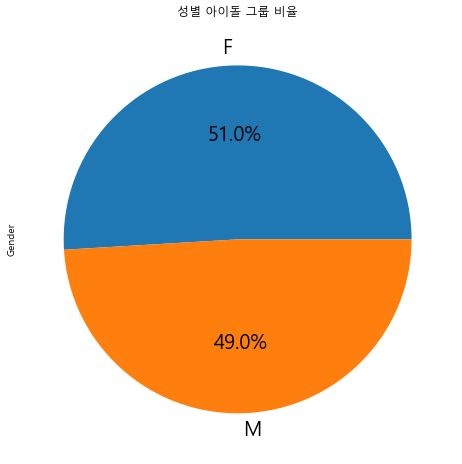

In [35]:
# 성별 아이돌 그룹 비율

gender_df = group_df['Gender'].value_counts()
gender_df.plot(kind = 'pie', figsize = (15, 8), title = '성별 아이돌 그룹 비율', autopct = '%.1f%%', fontsize = 20)

## 2. 현재 활동중인 아이돌 그룹 비율

<AxesSubplot:title={'center':'활동중 아이돌 그룹 비율'}, ylabel='Active'>

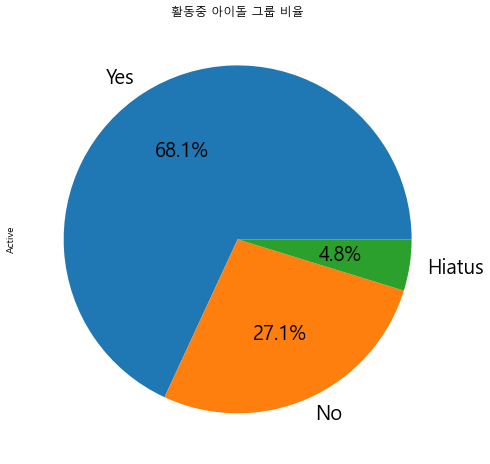

In [36]:
now_df = group_df['Active'].value_counts()
now_df.plot(kind = 'pie', figsize = (15, 8), title = '활동중 아이돌 그룹 비율', autopct = '%.1f%%', fontsize = 20)

## 3. 증가하거나 감소한 멤버수

In [37]:
group_df[['Members', 'Orig. Memb.']]

,Members,Orig. Memb.
0,5,9
1,4,4
2,4,4
3,4,5
4,4,4
...,...,...
205,7,7
206,8,8
207,7,7
208,10,10


In [38]:
# 변동 멤버수 컬럼 추가 생성

group_df['Change Memb.'] = group_df['Members'] - group_df['Orig. Memb.']
group_df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Change Memb.
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes,-4
1,씨엘,1991-02-26,2NE1,South Korea,171.286449,F,투애니원,2009-05-06,YG,4,4,No,0
2,효린,1990-12-11,SISTAR,South Korea,171.286449,F,씨스타,2010-03-06,Starship,4,4,No,0
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus,-1
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.286449,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,주한,2001-06-21,BLITZERS,South Korea,171.286449,M,블리처스,2021-05-12,Wuzo,7,7,Yes,0
206,위시,2002-06-11,EPEX,South Korea,184.000000,M,이펙스,2021-06-08,C9,8,8,Yes,0
207,한빈,1998-01-19,TEMPEST,Vietnam,176.000000,M,템페스트,2022-03-02,Yuehua,7,7,Yes,0
208,이든,1998-03-27,NINE.i,South Korea,171.286449,M,나인아이,2022-03-30,FirstOne,10,10,Yes,0


<AxesSubplot:title={'center':'그룹 멤버수 변동 현황'}, ylabel='Frequency'>

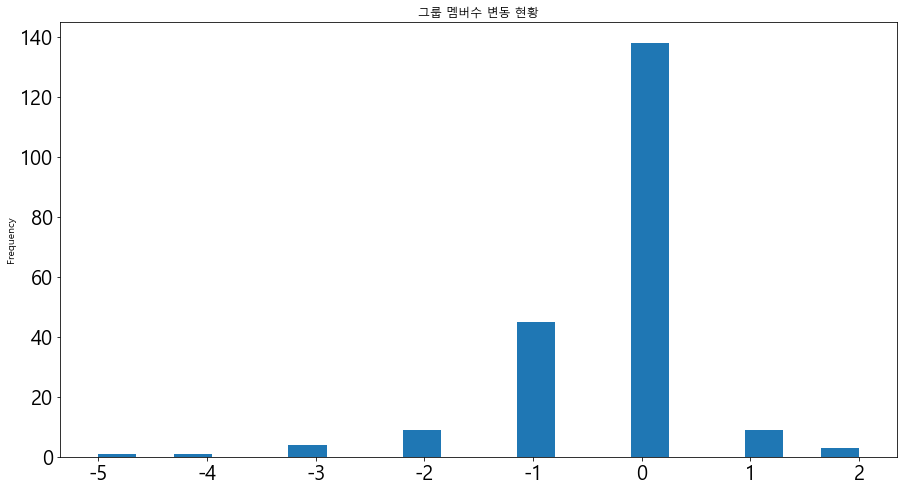

In [39]:
# 변동 멤버수 히스토그램

group_df['Change Memb.'].plot(bins = 20, kind = 'hist', figsize = (15, 8), title = '그룹 멤버수 변동 현황', fontsize = 20)

## 4. 데뷔일이 최근일수록 멤버수가 많은지

In [40]:
group_df['Debut'] = pd.to_datetime(group_df['Debut'])

In [42]:
# 데뷔 연도 컬럼 생성

group_df['Debut_Year'] = group_df['Debut'].dt.year
group_df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Change Memb.,Debut_Year
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes,-4,2007
1,씨엘,1991-02-26,2NE1,South Korea,171.286449,F,투애니원,2009-05-06,YG,4,4,No,0,2009
2,효린,1990-12-11,SISTAR,South Korea,171.286449,F,씨스타,2010-03-06,Starship,4,4,No,0,2010
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus,-1,2010
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.286449,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes,0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,주한,2001-06-21,BLITZERS,South Korea,171.286449,M,블리처스,2021-05-12,Wuzo,7,7,Yes,0,2021
206,위시,2002-06-11,EPEX,South Korea,184.000000,M,이펙스,2021-06-08,C9,8,8,Yes,0,2021
207,한빈,1998-01-19,TEMPEST,Vietnam,176.000000,M,템페스트,2022-03-02,Yuehua,7,7,Yes,0,2022
208,이든,1998-03-27,NINE.i,South Korea,171.286449,M,나인아이,2022-03-30,FirstOne,10,10,Yes,0,2022


In [43]:
# 데뷔 연도 그룹별 멤버수 평균

member_df = group_df.groupby('Debut_Year')['Members'].mean()
member_df

Debut_Year
1998     6.000000
2003     2.000000
2005    11.000000
2006     4.000000
2007     4.250000
2008     4.500000
2009     4.428571
2010     4.700000
2011     5.125000
2012     4.941176
2013     4.750000
2014     5.250000
2015     6.636364
2016     7.750000
2017     7.571429
2018     7.250000
2019     5.538462
2020     6.115385
2021     6.933333
2022     7.000000
Name: Members, dtype: float64

<AxesSubplot:title={'center':'데뷔연도별 평균 멤버수 추이'}, xlabel='Debut_Year'>

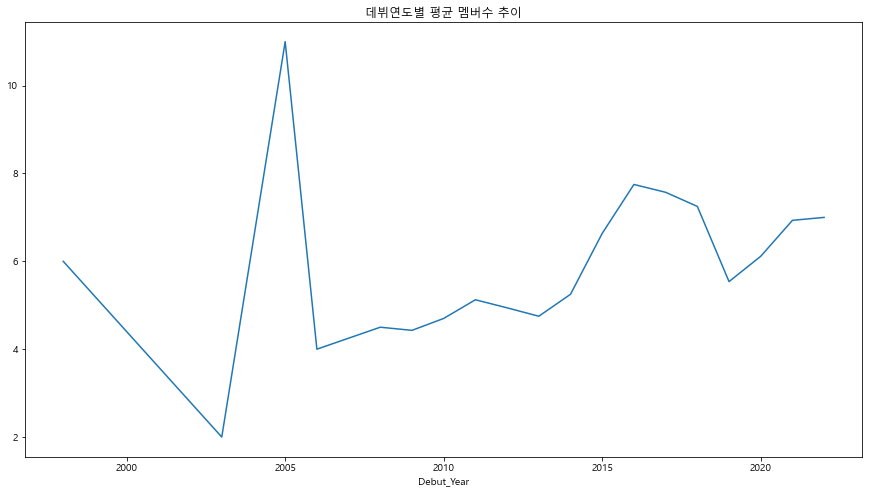

In [44]:
# 데뷔일 기준, 멤버수 추이

member_df.plot(kind = 'line', x = 'Debut', y = 'Members', figsize = (15, 8), title = '데뷔연도별 평균 멤버수 추이')